https://towardsdatascience.com/ridge-and-lasso-regression-a-complete-guide-with-python-scikit-learn-e20e34bcbf0b

In [2]:
import math 
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
# difference of lasso and ridge regression is that some of the coefficients can be zero i.e. some of the features are 
# completely neglected
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [3]:
cancer = load_breast_cancer()
print(cancer.keys())
cancer_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
print(cancer_df.head(3))
X = cancer.data
Y = cancer.target

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38           122.8     1001.0          0.11840   
1        20.57         17.77           132.9     1326.0          0.08474   
2        19.69         21.25           130.0     1203.0          0.10960   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   

   mean fractal dimension           ...             worst radius  \
0                 0.07871           ...                    25.38   
1                 0.05667           ...                    24.99   
2                 0.05999           ...                    23.57   

   worst texture  worst perimeter  worst area  wo

In [5]:
X_train,X_test,y_train,y_test=train_test_split(X,Y, test_size=0.3, random_state=31)

In [6]:
lasso = Lasso()
lasso.fit(X_train,y_train)
train_score=lasso.score(X_train,y_train)
test_score=lasso.score(X_test,y_test)
coeff_used = np.sum(lasso.coef_!=0)
print("training score:", train_score )
print("test score: ", test_score)
print("number of features used: ", coeff_used)

training score: 0.5600974529893081
test score:  0.5832244618818156
number of features used:  4


In [7]:
lasso001 = Lasso(alpha=0.01, max_iter=10e5)
lasso001.fit(X_train,y_train)
train_score001=lasso001.score(X_train,y_train)
test_score001=lasso001.score(X_test,y_test)
coeff_used001 = np.sum(lasso001.coef_!=0)
print("training score for alpha=0.01:", train_score001 )
print("test score for alpha =0.01: ", test_score001)
print("number of features used: for alpha =0.01:", coeff_used001)

training score for alpha=0.01: 0.7037865778498829
test score for alpha =0.01:  0.6641831577726227
number of features used: for alpha =0.01: 10


In [8]:
lasso00001 = Lasso(alpha=0.0001, max_iter=10e5)
lasso00001.fit(X_train,y_train)
train_score00001=lasso00001.score(X_train,y_train)
test_score00001=lasso00001.score(X_test,y_test)
coeff_used00001 = np.sum(lasso00001.coef_!=0)
print("training score for alpha=0.0001:", train_score00001 )
print("test score for alpha =0.0001: ", test_score00001)
print("number of features used: for alpha =0.0001:", coeff_used00001)

training score for alpha=0.0001: 0.7754092006936697
test score for alpha =0.0001:  0.7318608210757909
number of features used: for alpha =0.0001: 22


In [9]:
lr = LinearRegression()
lr.fit(X_train,y_train)
lr_train_score=lr.score(X_train,y_train)
lr_test_score=lr.score(X_test,y_test)
print("LR training score:", lr_train_score )
print("LR test score: ", lr_test_score)

LR training score: 0.7842206194055069
LR test score:  0.7329325010888683


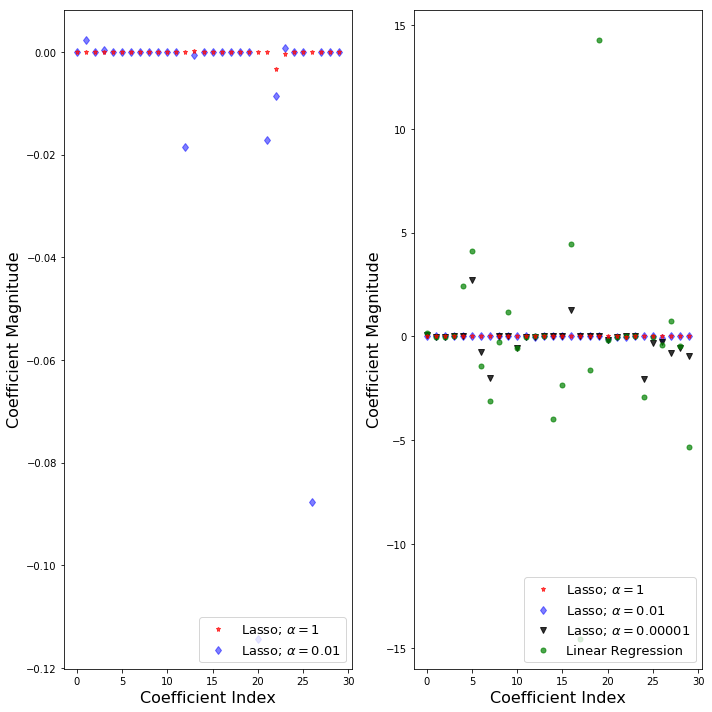

'\n#output \ntraining score: 0.5600974529893081\ntest score:  0.5832244618818156\nnumber of features used:  4\ntraining score for alpha=0.01: 0.7037865778498829\ntest score for alpha =0.01:  0.664183157772623\nnumber of features used: for alpha =0.01: 10\ntraining score for alpha=0.0001: 0.7754092006936697\ntest score for alpha =0.0001:  0.7318608210757904\nnumber of features used: for alpha =0.0001: 22\nLR training score: 0.7842206194055068\nLR test score:  0.7329325010888681'

In [12]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)

plt.subplot(1,2,2)
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency
plt.plot(lasso00001.coef_,alpha=0.8,linestyle='none',marker='v',markersize=6,color='black',label=r'Lasso; $\alpha = 0.00001$') # alpha here is for transparency
plt.plot(lr.coef_,alpha=0.7,linestyle='none',marker='o',markersize=5,color='green',label='Linear Regression',zorder=2)
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.tight_layout()
plt.show()

"""
#output 
training score: 0.5600974529893081
test score:  0.5832244618818156
number of features used:  4
training score for alpha=0.01: 0.7037865778498829
test score for alpha =0.01:  0.664183157772623
number of features used: for alpha =0.01: 10
training score for alpha=0.0001: 0.7754092006936697
test score for alpha =0.0001:  0.7318608210757904
number of features used: for alpha =0.0001: 22
LR training score: 0.7842206194055068
LR test score:  0.7329325010888681"""

In [14]:
lasso.coef_

array([-0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -9.10366021e-05,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  2.28811188e-04, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -3.29832072e-03, -3.76623718e-04,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00])

In [15]:
lr.coef_

array([ 1.67324277e-01, -2.38350190e-03, -1.67262781e-02, -5.17432511e-04,
        2.42781026e+00,  4.11156312e+00, -1.42172340e+00, -3.13091564e+00,
       -2.71400589e-01,  1.19761170e+00, -5.41541779e-01, -2.03189135e-02,
        1.34001822e-02,  2.10709069e-03, -3.96495175e+00, -2.33378721e+00,
        4.45575182e+00, -1.45595817e+01, -1.61030139e+00,  1.42825079e+01,
       -1.88569322e-01, -7.48404826e-03,  5.43187478e-03,  8.95489127e-04,
       -2.93075605e+00, -1.77733846e-02, -4.26139986e-01,  7.40651232e-01,
       -4.52432737e-01, -5.31286802e+00])